<a href="https://colab.research.google.com/github/brunamulinari/TechLabsProject_PsiData/blob/main/suicidios_saudemental_OMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dados da OMS sobre suicídio por países - de 2000 a 2020**

# Seleção de dados da OMS sobre suicídio por países da América Latina, para comparação com países ricos (EUA, Alemanha e Japão) - de 2017 a 2019


A base original tem dados desde os anos 2000 até 2019, no entanto a intenção é utilizar apenas dos anos 2017 até 2019.

A base também possui dados sobre todos os países, porém a intenção é capturar dados apenas dos países da América Latina e comparar com os dados de alguns outros países de primeiro mundo.

In [25]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np

In [26]:
#Importando base de dados .csv da OMS sobre a taxa de suicídios dos países do ano 2000 até 2020 

#até aprender a usar a API:
  #1 - subir os arquivos na lateral esquerda do google Colab
  #2 - ou buscar outra forma de puxar os arquivos, através de um link do google drive

suic00_20 = pd.read_csv('OMS-taxas-suicidio-paises-2000_2020.csv', header=1)
#dica: df = pd.read_csv('dados.csv', sep=';', names=['nome_completo', 'idade'], header=0)


In [27]:
#Exibindo as 5 primeiras linhas

suic00_20.head()

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,4.1 [2.3-7.0],4.1 [2.3-6.8],4.1 [2.3-6.8],4.0 [2.3-6.7],4.0 [2.3-6.6],3.9 [2.3-6.6],4.0 [2.3-6.7],4.0 [2.3-6.6],4.1 [2.4-6.8],4.3 [2.5-7.0],4.4 [2.6-7.2],4.6 [2.7-7.6],4.8 [2.8-7.9],4.9 [2.8-8.0],5.0 [2.9-8.1],5.0 [2.9-8.2],5.0 [2.8-8.1],5.0 [2.9-8.2],5.0 [2.9-8.2],4.9 [2.8-8.0]
1,Afghanistan,Male,4.6 [2.6-7.9],4.6 [2.6-7.8],4.6 [2.7-7.9],4.4 [2.6-7.4],4.3 [2.5-7.3],4.2 [2.5-7.2],4.3 [2.5-7.4],4.3 [2.5-7.3],4.5 [2.6-7.5],4.6 [2.7-7.7],4.8 [2.8-8.0],5.1 [2.9-8.4],5.3 [3.0-8.8],5.4 [3.1-8.8],5.4 [3.1-8.9],5.4 [3.1-8.9],5.3 [3.0-8.7],5.4 [3.0-8.9],5.2 [2.9-8.7],5.0 [2.8-8.3]
2,Afghanistan,Female,3.6 [2.0-5.9],3.5 [2.0-5.8],3.4 [2.0-5.7],3.6 [2.1-5.9],3.6 [2.0-5.9],3.6 [2.1-5.9],3.7 [2.1-6.0],3.7 [2.2-6.0],3.8 [2.2-6.1],3.9 [2.3-6.2],4.0 [2.3-6.4],4.2 [2.4-6.7],4.3 [2.5-6.9],4.4 [2.6-7.1],4.5 [2.6-7.3],4.6 [2.7-7.5],4.6 [2.7-7.4],4.6 [2.7-7.5],4.8 [2.8-7.8],4.8 [2.8-7.7]
3,Albania,Both sexes,4.3 [2.4-6.7],4.5 [2.5-6.9],4.7 [2.6-7.1],4.7 [2.6-7.1],4.8 [2.6-7.2],5.0 [2.7-7.4],5.3 [3.0-7.7],5.2 [2.9-7.5],7.9 [4.8-11.1],7.8 [4.7-10.8],8.1 [4.9-11.0],8.2 [5.0-10.9],8.1 [5.0-10.7],7.8 [4.9-10.2],7.5 [4.8-9.7],4.8 [3.1-6.3],4.8 [3.2-6.3],4.6 [3.1-6.0],4.5 [3.1-5.9],4.9 [3.4-6.4]
4,Albania,Male,5.9 [3.1-9.3],6.2 [3.2-9.6],6.3 [3.3-9.9],6.3 [3.2-9.7],6.3 [3.2-9.6],6.6 [3.4-10.0],6.9 [3.5-10.3],6.9 [3.5-10.1],7.5 [3.9-10.7],9.5 [5.0-13.4],10.2 [5.3-14.0],10.3 [5.5-14.0],10.3 [5.6-13.9],9.8 [5.4-13.0],9.7 [5.5-12.8],6.5 [3.8-8.5],6.4 [3.8-8.3],6.2 [3.9-8.1],6.1 [3.9-8.0],7.0 [4.6-9.2]


In [28]:
#excluir as colunas dos anos menores que 2017

suic00_20 = suic00_20.drop(columns=['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', 
                                    '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000'])
suic00_20.head()

,Country,Sex,2019,2018,2017
0,Afghanistan,Both sexes,4.1 [2.3-7.0],4.1 [2.3-6.8],4.1 [2.3-6.8]
1,Afghanistan,Male,4.6 [2.6-7.9],4.6 [2.6-7.8],4.6 [2.7-7.9]
2,Afghanistan,Female,3.6 [2.0-5.9],3.5 [2.0-5.8],3.4 [2.0-5.7]
3,Albania,Both sexes,4.3 [2.4-6.7],4.5 [2.5-6.9],4.7 [2.6-7.1]
4,Albania,Male,5.9 [3.1-9.3],6.2 [3.2-9.6],6.3 [3.3-9.9]


In [ ]:
#seleção dos países da América Latina + 3 países ricos (EUA, Alemanha e Japão)

lista = list(['Brazil', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
              'Bolivia (Plurinational State of)', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador',
              'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Jamaica', 'Mexico', 'Nicaragua', 
              'Panama', 'Paraguay', 'Peru', 'Saint Vincent and the Grenadines', 'Saint Lucia',
              'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)', 'United States of America', 'Germany', 'Japan'])

suic00_20 = suic00_20.loc[suic00_20['Country'].isin(lista)]

In [35]:
#renomear os nomes das colunas 'Country' e 'Sex'

suic00_20.rename(columns={'Country': 'País'}, inplace = True)
suic00_20.rename(columns={'Sex': 'Sexo'}, inplace = True)

In [36]:
#exibir as mudanças com a seleção específica de dados

suic00_20.head(10)

,País,Sexo,2019,2018,2017
12,Antigua and Barbuda,Both sexes,0.4 [0.3-0.6],0.4 [0.3-0.5],0.0 [0.0-0.0]
13,Antigua and Barbuda,Male,0.0 [0.0-0.0],0.0 [0.0-0.0],0.0 [0.0-0.0]
14,Antigua and Barbuda,Female,0.8 [0.5-1.1],0.7 [0.5-1.0],0.0 [0.0-0.0]
15,Argentina,Both sexes,8.4 [6.7-10.3],9.2 [7.4-11.2],8.9 [7.3-10.7]
16,Argentina,Male,13.7 [10.9-16.8],15.1 [12.2-18.3],14.5 [11.9-17.3]
17,Argentina,Female,3.3 [2.6-4.2],3.6 [2.8-4.4],3.5 [2.8-4.3]
30,Bahamas,Both sexes,3.5 [2.4-5.0],3.5 [2.4-5.0],3.4 [2.4-4.7]
31,Bahamas,Male,5.9 [4.1-8.4],6.0 [4.2-8.4],5.9 [4.1-8.1]
32,Bahamas,Female,1.3 [0.8-1.9],1.2 [0.8-1.8],1.1 [0.7-1.5]
39,Barbados,Both sexes,0.6 [0.4-0.8],0.6 [0.4-0.8],0.6 [0.4-0.8]


In [32]:
## Visualizando novo tamanho total do banco de dados

suic00_20.shape

(93, 5)

Como mostra o resultado, agora a base de dados tem 93 linhas e 5 colunas

In [33]:
#Quantidade de dados em cada coluna, tipo de variável

suic00_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 12 to 536
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  93 non-null     object
 1   Sex      93 non-null     object
 2   2019     93 non-null     object
 3   2018     93 non-null     object
 4   2017     93 non-null     object
dtypes: object(5)
memory usage: 4.4+ KB


Conforme observado, todas as variáveis são do tipo 'string' (object), no entanto, apenas as variáveis da coluna 'Country' precisam ser strings, pois são nomes de países. Agora as variáveis das colunas 'Sex' podem ser alteradas para 'int' uma vez que são categóricas. Nas colunas de anos podem ainda ter outro formato, de preferência numérico, e o melhor nesse caso seria para variáveis do tipo 'float' que comportam número decimais, uma vez que a taxa de homicídios por ano, é um número decimal.

In [ ]:
#tentativa de excluir os dados entre colchetes '[]' das variáveis

#result = string.rstrip('/')
suic00_20 = 2019.rstrip('[')
suic00_20.head()

SyntaxError: ignored

In [ ]:
#tentativa de transformar as variáveis 'string' em 'inteiras' e 'float'

In [34]:
#estatísticas básicas sobre a base de dados

suic00_20.describe(include=['object'])

,Country,Sex,2019,2018,2017
count,93,93,93,93,93
unique,31,3,92,87,88
top,Trinidad and Tobago,Female,0.6 [0.4-0.8],0.0 [0.0-0.0],0.0 [0.0-0.0]
freq,3,31,2,2,6


Breve descrição das estatísticas
// **ainda precisa preencher**

//aqui é necessário continuar a analisar a base de dados com outros comandos

# Dados da OMS sobre estrutura de atendimento para saúde mental nos países do ano de 2016

Iniciando 2ª base de dados - dados da OMS sobre estrutura de atendimento para saúde mental nos países do ano de 2016

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [39]:


df_saudeM2016 = pd.read_csv("OMS-estruturas-de-saude-mental-paises_2016.csv")

In [40]:
#Exibindo as 5 primeiras linhas 
df_saudeM2016.head()

,Country,Year,Mental hospitals (per 100 000 population),Mental health units in general hospitals (per 100 000 population),Mental health outpatient facilities (per 100 000 population),Mental health day treatment facilities (per 100 000 population),Community residential facilities (per 100 000 population)
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN


In [42]:
#Alterar os nomes de colunas

df_saudeM2016.rename(columns={'Country': 'País'}, inplace = True)
df_saudeM2016.rename(columns={'Year': 'Ano'}, inplace = True)

df_saudeM2016.rename(columns={'Mental hospitals (per 100 000 population)': 'Taxa de hospitais psiquiátricos'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health units in general hospitals (per 100 000 population)': 'Taxa de unidades psiquiátricas em hospitais'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health outpatient facilities (per 100 000 population)': 'Taxa de ambulatórios psiquiátricos'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health day treatment facilities (per 100 000 population)': 'Taxa de tratamentos psiquiátricos diários'}, inplace = True)
df_saudeM2016.rename(columns={'Community residential facilities (per 100 000 population)': 'Taxa de instalações comunitárias'}, inplace = True)

In [45]:
#visualizar mudanças nos nomes das colunas
df_saudeM2016.head(0)

,País,Ano,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias


**Todas as taxas são relativas a quantidade por 100 mil habitantes.**

In [46]:
# Visualizando tamanho total do banco 
df_saudeM2016.shape

(163, 7)

De acordo com o comando executado o banco de dados tem 163 linhas e 7 colunas

In [47]:
#seleção dos países da América Latina + 3 países ricos (EUA, Alemanha e Japão)

lista2 = list(['Brazil', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
              'Bolivia (Plurinational State of)', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador',
              'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Jamaica', 'Mexico', 'Nicaragua', 
              'Panama', 'Paraguay', 'Peru', 'Saint Vincent and the Grenadines', 'Saint Lucia',
              'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)', 'United States of America', 'Germany', 'Japan'])

df_saudeM2016 = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista2)]

In [48]:
#visualizar mudanças a partir da seleção específica de países
df_saudeM2016.head(10)

,País,Ano,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN
5,Argentina,2016,0.937,1.071,1.720,NaN,0.152
10,Bahamas,2015,0.259,0.259,0.517,0.259,NaN
13,Barbados,2015,0.352,0.352,4.574,NaN,0.704
16,Belize,2016,NaN,1.948,2.227,0.278,0.278
18,Bolivia (Plurinational State of),2016,0.075,0.009,0.009,NaN,NaN
21,Brazil,2016,0.069,0.115,1.491,NaN,0.267
31,Chile,2016,0.023,0.175,0.839,0.315,1.171
33,Colombia,2016,1.988,0.222,0.292,NaN,NaN
37,Costa Rica,2016,0.042,0.042,1.706,0.125,0.042


In [55]:
# Visualizando mudanças no tamanho total do banco 
df_saudeM2016.shape

(30, 7)

Conforme se observa, após a seleção específica de países da América Latina e de três países ricos (EUA, Alemanha e Japão), o número de linhas diminuiu para 30.

In [63]:
#Transformar as variáveis da coluna 'Ano' que são do tipo inteiro para o 
#tipo string. Assim evita-se criar estatísticas a partir do numeral do ano

df_saudeM2016['Ano'] = df_saudeM2016['Ano'].astype(str)

In [64]:
#Quantidade de dados em cada coluna, tipo de variável

df_saudeM2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 4 to 156
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   País                                         30 non-null     object 
 1   Ano                                          30 non-null     object 
 2   Taxa de hospitais psiquiátricos              29 non-null     float64
 3   Taxa de unidades psiquiátricas em hospitais  26 non-null     float64
 4   Taxa de ambulatórios psiquiátricos           28 non-null     float64
 5   Taxa de tratamentos psiquiátricos diários    15 non-null     float64
 6   Taxa de instalações comunitárias             15 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.9+ KB


In [74]:
#estatísticas básicas sobre a base de dados

df_saudeM2016.describe()

,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias
count,29.000000,26.000000,28.000000,15.000000,15.000000
mean,0.583310,0.318962,2.583143,2.987800,0.594667
std,1.554114,0.435043,4.166354,9.101527,0.835805
min,0.006000,0.006000,0.009000,0.015000,0.006000
25%,0.029000,0.045750,0.284000,0.076500,0.037500
50%,0.075000,0.174000,1.127500,0.259000,0.267000
75%,0.352000,0.351250,2.755000,0.528500,0.937500
max,8.314000,1.948000,19.751000,35.631000,2.994000


//escrever aqui breve análise observada a partir dos dados

In [82]:
#exibindo resultados para EUA, Alemanha e Japão, afim de comparar diferenças
print(df_saudeM2016['Japan'])

KeyError: ignored

In [53]:
# Importar bibliotecas necessárias para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

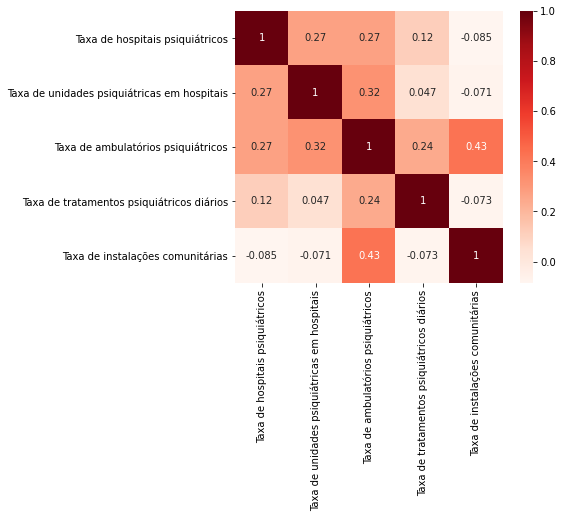

In [66]:
#exibição de um gráfico de correlação entre variáveis

plt.figure (figsize = (6,5)) 
cor = df_saudeM2016.corr () 
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds) 
plt.show ()

// fazer breve análise acerca dos níveis de correlação observados

In [68]:
# Exibindo a correlação das demais variáveis com a quantidade (taxa) de hospitais de saúde mental 
corr_taxaHospSM = cor['Taxa de hospitais psiquiátricos']
print(corr_taxaHospSM)

Taxa de hospitais psiquiátricos                1.000000
Taxa de unidades psiquiátricas em hospitais    0.273249
Taxa de ambulatórios psiquiátricos             0.274971
Taxa de tratamentos psiquiátricos diários      0.117629
Taxa de instalações comunitárias              -0.084582
Name: Taxa de hospitais psiquiátricos, dtype: float64


In [70]:
# Seleção das características altamente correlacionadas, com nível de correlação maior que 0,5
alta_corr = corr_taxaHospSM[(abs(corr_taxaHospSM) > 0.5)] 
print(alta_corr)


Taxa de hospitais psiquiátricos    1.0
Name: Taxa de hospitais psiquiátricos, dtype: float64


--> Ou seja, pelo resultado observado, não houve nenhuma outra variável altamente correlacionada com a taxa de quantiadade de hospitais de saúde mental

In [ ]:
#quantidades de valores de algumas colunas
df_cwb['Sexo'].value_counts()